---

## Predicting Students' Math Scores Using Linear Regression
#### Author: Tianyi Mao

---

This project focuses on predicting students' math score using a dataset of students performance, following a 4-step process typical of a machine learning workflow:

**Step 1**: Data Cleaning and Analysis  
**Step 2**: Train the Model  
**Step 3**: Evaluate the Model  
**Step 4**: Performance Analysis

### Step 1: Data Cleaning and Analysis

In this step, we:
1. Load the dataset and inspect its structure.
2. Encode categorical variables using dummy encoding.
3. Normalize the numerical features to ensure all features are on the same scale.
4. Split the data into training and testing sets for model evaluation.

We also visualize:
- The **distribution of the target variable** (math scores) to understand its spread.
- A **correlation heatmap** to analyze relationships between features and the target variable.


In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Dataset Shape: (1000, 8)

Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


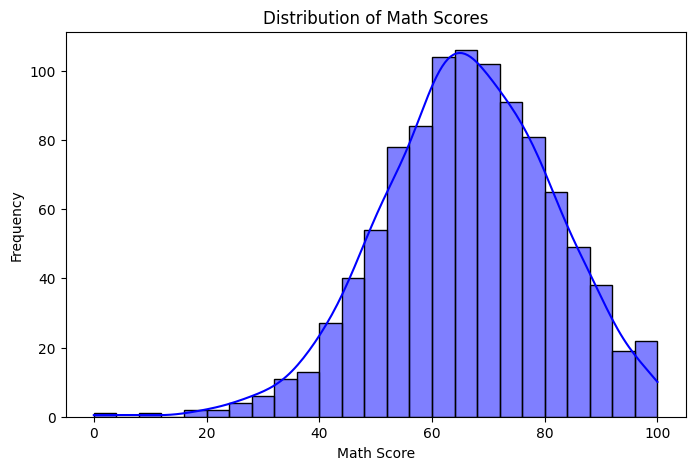

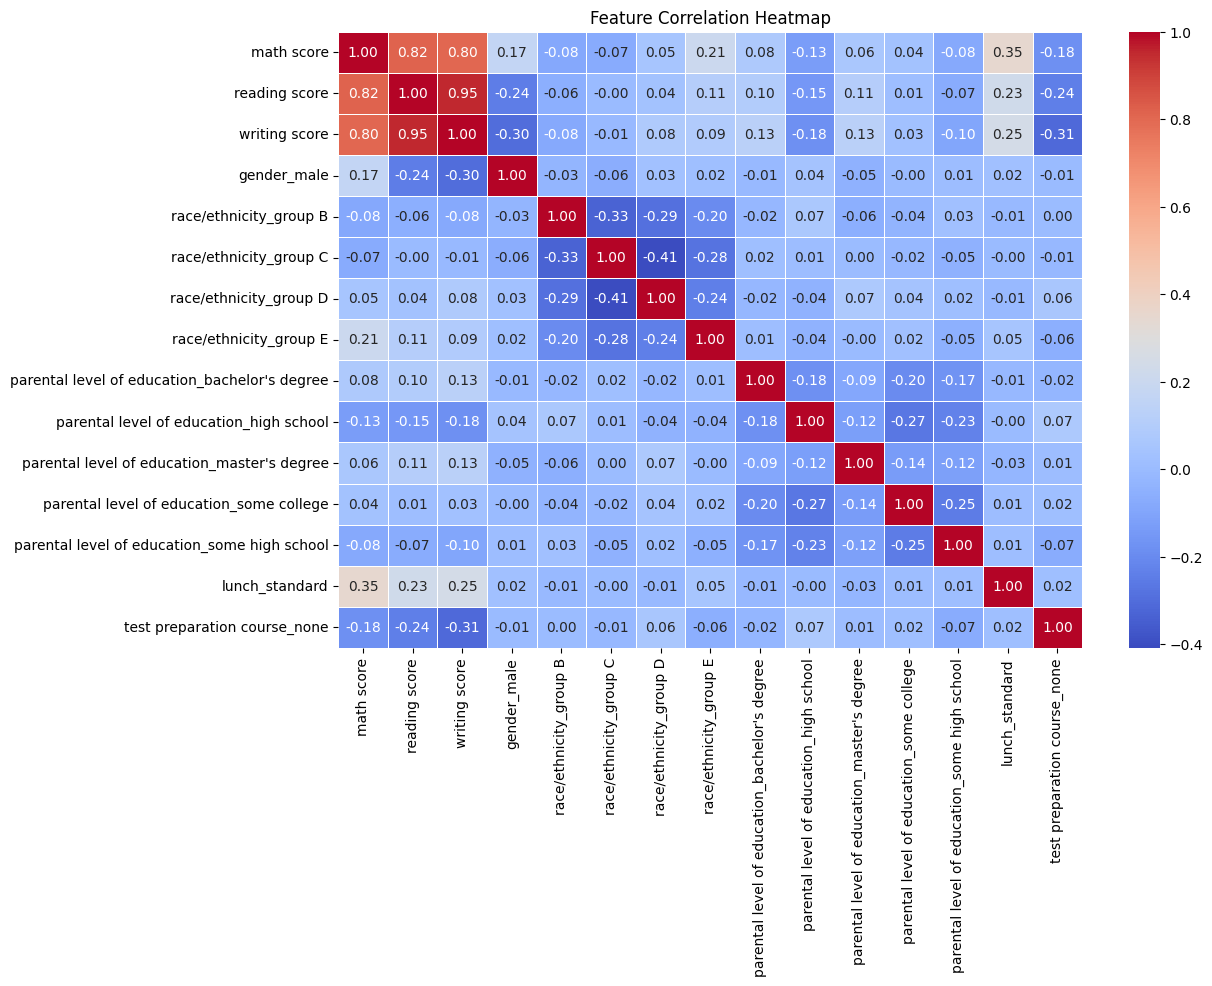

In [12]:
# Load and inspect the dataset
data_path = '/Users/sherrymao/Documents/Git/INDE577-TianyiMao/Data/Performance_data/StudentsPerformance.csv'
students_data = pd.read_csv(data_path)

# Inspect the dataset
print("Dataset Shape:", students_data.shape)
print("\nData Types:")
print(students_data.dtypes)

# Preprocessing: Encode categorical variables
students_encoded = pd.get_dummies(
    students_data, 
    columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], 
    drop_first=True
)

# Separate features and target variable
X = students_encoded.drop(columns=['math score'])
y = students_encoded['math score']

# Convert features to numeric if necessary (ensures all data is numeric)
X = X.astype(float)

# Normalize the features (standardization: z = (x - mean) / std)
X_np = X.to_numpy()
mu = X_np.mean(axis=0)
sigma = X_np.std(axis=0)
X_normalized = (X_np - mu) / sigma

# Add a bias column (intercept)
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='blue')
plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = students_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
# Normal Equation for Linear Regression
theta_ne = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred_ne = X_test @ theta_ne

# Ridge Regression
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Lasso Regression
lasso_reg = Lasso(alpha=0.01).fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5).fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)

### Step 2: Train the Model

In this step, we train several regression models to predict students' math scores based on the processed dataset. Each model addresses the task differently, balancing accuracy and complexity. Below are detailed descriptions of the models:

---

#### **Normal Equation**

The **Normal Equation** is a closed-form solution for finding the optimal weights (\( \theta \)) in a linear regression model. It minimizes the cost function by solving the equation:

$$
\theta = (X^T X)^{-1} X^T y
$$

**How it works**:
- Directly computes the weights that minimize the sum of squared errors between predictions and actual values.
- No need for iterative processes like gradient descent.

**Advantages**:
- Provides the exact solution.
- Efficient for datasets with a small to moderate number of features.

**Disadvantages**:
- Computationally expensive for large datasets due to the matrix inversion step (\( O(n^3) \)).

---

#### **Ridge Regression**

Ridge Regression introduces **L2 regularization**, which adds a penalty term proportional to the square of the weights. The modified cost function is:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^n \theta_j^2
$$


**How it works**:
- Shrinks large coefficients toward zero but does not eliminate them entirely.
- Useful when features are highly correlated (multicollinearity).

**Advantages**:
- Reduces overfitting by penalizing large coefficients.
- Handles multicollinearity effectively.

**Disadvantages**:
- Does not perform feature selection.

---

#### **Lasso Regression**

Lasso Regression introduces **L1 regularization**, which adds a penalty proportional to the absolute value of the weights. The modified cost function is:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^n |\theta_j|
$$

**How it works**:
- Encourages some coefficients to become exactly zero, effectively performing feature selection.
- Useful when there are many irrelevant or redundant features.

**Advantages**:
- Automatically selects important features by shrinking irrelevant ones to zero.
- Can lead to simpler and more interpretable models.

**Disadvantages**:
- May struggle with highly correlated features.

---

#### **ElasticNet Regression**

ElasticNet combines both **L1** and **L2 regularization**, balancing Ridge and Lasso's properties. The cost function is:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2 + \lambda_1 \sum_{j=1}^n |\theta_j| + \lambda_2 \sum_{j=1}^n \theta_j^2
$$


**How it works**:
- Retains Ridge's ability to handle multicollinearity and Lasso's feature selection capabilities.
- Adjusts the ratio of L1 to L2 penalties through the `l1_ratio` hyperparameter.

**Advantages**:
- Effective for datasets with many features, especially when some are correlated.
- Flexible and combines the strengths of Ridge and Lasso.

**Disadvantages**:
- Requires tuning of multiple hyperparameters.

---

In [14]:
# Normal Equation for Linear Regression
theta_ne = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred_ne = X_test @ theta_ne

# Ridge Regression
ridge_reg = Ridge(alpha=1).fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Lasso Regression
lasso_reg = Lasso(alpha=0.01).fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5).fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)


### Step 3: Evaluate the Model

We evaluate the performance of each model using the following metrics:
1. **Mean Squared Error (MSE)**: Measures the average squared difference between predictions and actual values.
2. **R-squared**: Represents the proportion of variance explained by the model.

We also visualize:
- A **bar plot** comparing MSE across all models.
- A **residual plot** for the best-performing model to analyze errors.


Model Performance Metrics:
Normal Equation: MSE = 30.89, R2 = 0.88
Ridge Regression: MSE = 30.87, R2 = 0.88
Lasso Regression: MSE = 30.81, R2 = 0.88
ElasticNet Regression: MSE = 30.83, R2 = 0.88


/var/folders/1h/pt2dqtvd0_733mkpkbgbr4tr0000gn/T/ipykernel_72651/1462152683.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_values, palette="viridis")


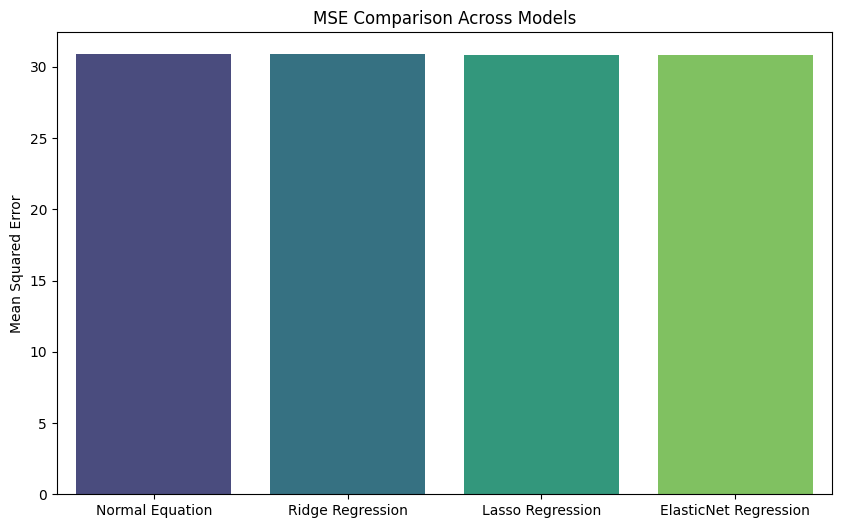

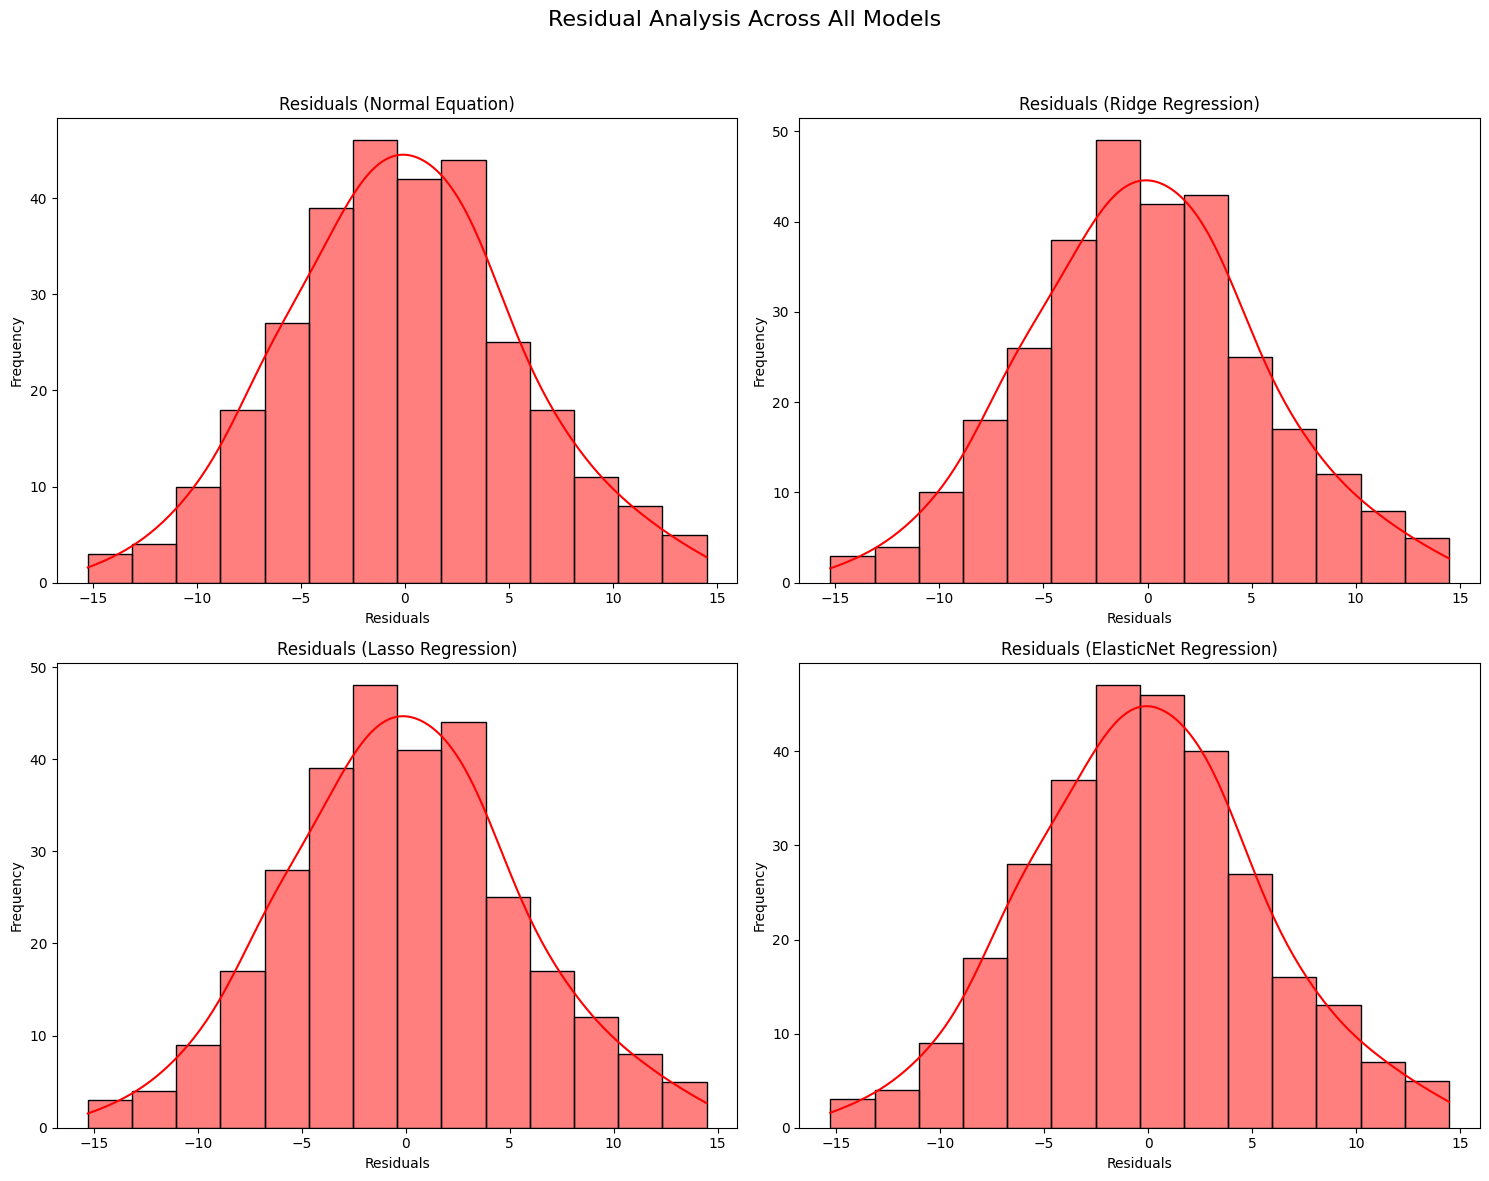

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# List of models and predictions
models = ["Normal Equation", "Ridge Regression", "Lasso Regression", "ElasticNet Regression"]
predictions = [y_pred_ne, y_pred_ridge, y_pred_lasso, y_pred_elastic]

# ------------------------------------------------------
# 1. Evaluate All Models
# ------------------------------------------------------
print("Model Performance Metrics:")
for model, y_pred in zip(models, predictions):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model}: MSE = {mse:.2f}, R2 = {r2:.2f}")

# ------------------------------------------------------
# 2. Visualize MSE Comparison Across Models
# ------------------------------------------------------
mse_values = [mean_squared_error(y_test, pred) for pred in predictions]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values, palette="viridis")
plt.title("MSE Comparison Across Models")
plt.ylabel("Mean Squared Error")
plt.show()

# ------------------------------------------------------
# 3. Residual Analysis for All Models
# ------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Residual Analysis Across All Models", fontsize=16)

for i, ax in enumerate(axes.flat):
    # Calculate residuals
    residuals = y_test - predictions[i]
    
    # Plot residual distribution
    sns.histplot(residuals, kde=True, color='red', ax=ax)
    ax.set_title(f"Residuals ({models[i]})")
    ax.set_xlabel("Residuals")
    ax.set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



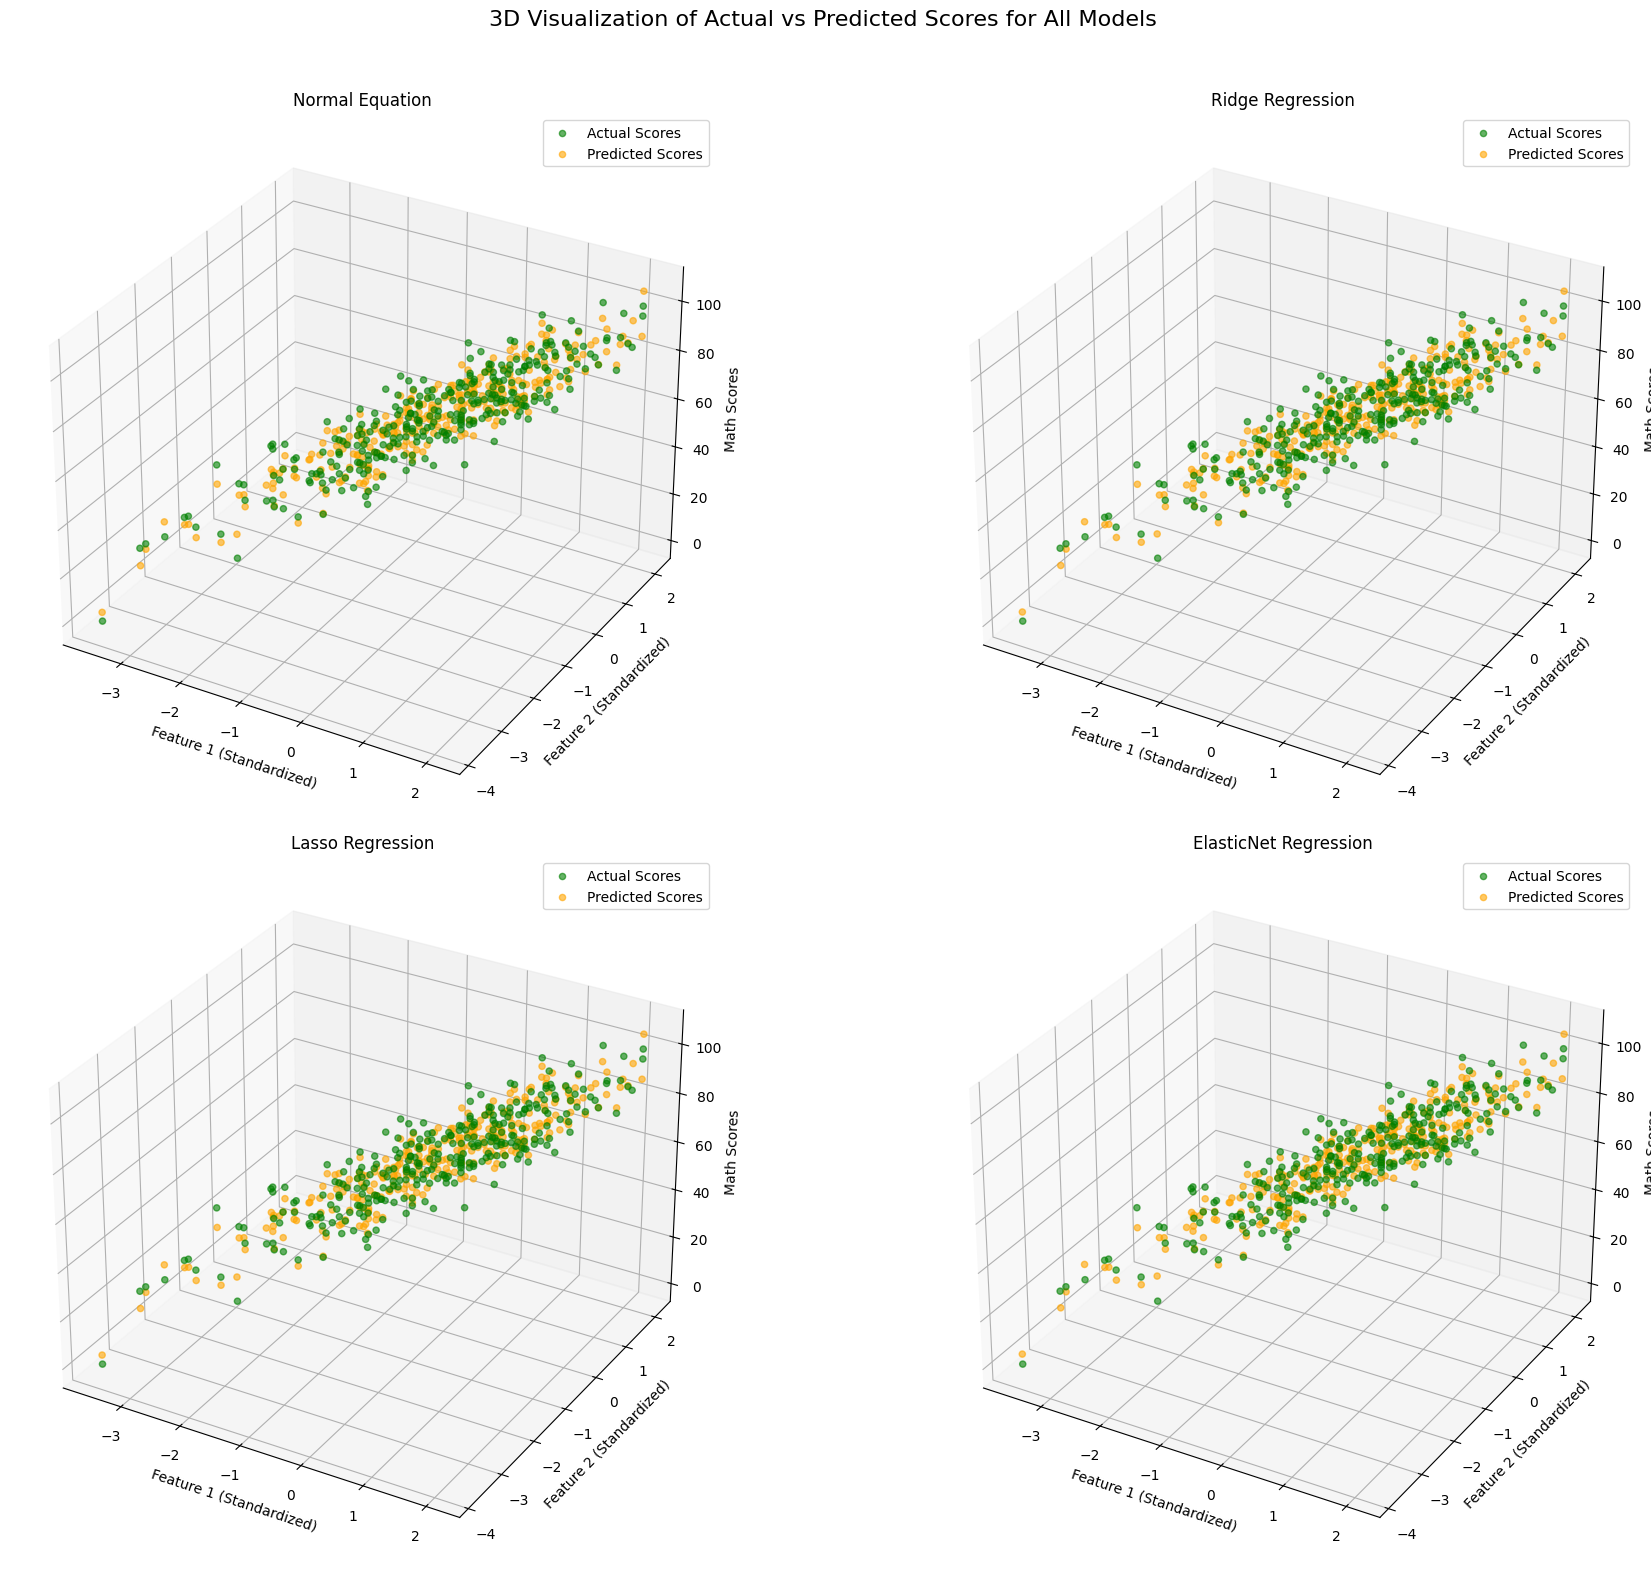

In [ ]:
# Prepare model names and predictions for easy iteration
model_names = ["Normal Equation", "Ridge Regression", "Lasso Regression", "ElasticNet Regression"]
predictions = [y_pred_ne, y_pred_ridge, y_pred_lasso, y_pred_elastic]

# ------------------------------------------------------
# 3D Scatter Plots for All Models
# ------------------------------------------------------
fig = plt.figure(figsize=(20, 16))
fig.suptitle("3D Visualization of Actual vs Predicted Scores for All Models", fontsize=16)

# Create a 2x2 grid of 3D plots
for i, model_name in enumerate(model_names):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    
    # Plot actual scores in green
    ax.scatter3D(X_test[:, 1], X_test[:, 2], y_test, c='green', label='Actual Scores', alpha=0.6)
    
    # Plot predicted scores for the model
    ax.scatter3D(X_test[:, 1], X_test[:, 2], predictions[i], c='orange', label='Predicted Scores', alpha=0.6)
    
    # Label the axes
    ax.set_xlabel("Feature 1 (Standardized)")
    ax.set_ylabel("Feature 2 (Standardized)")
    ax.set_zlabel("Math Scores")
    ax.set_title(f"{model_name}")
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Step 4: Performance Analysis

The performance of all four models was nearly identical. The \( R^2 \) scores for all models were 0.88, indicating that each model was able to explain **88% of the variance** in the math scores. Additionally, the Mean Squared Error (MSE) values were consistently close, with minor numerical differences:  

| **Model**             | **MSE** | **\( R^2 \)** |
|------------------------|---------|--------------|
| **Normal Equation**    | 30.89   | 0.88         |
| **Ridge Regression**   | 30.87   | 0.88         |
| **Lasso Regression**   | 30.81   | 0.88         |
| **ElasticNet**         | 30.83   | 0.88         |

These results highlight the consistency and reliability of the models. While Ridge, Lasso, and ElasticNet introduce regularization to control overfitting, the improvements over the standard Normal Equation were minimal for this dataset.   

To further evaluate the models, we inspected the **residuals**. While the Normal Equation and Ridge Regression produced nearly identical residual distributions, Lasso Regression showed a slightly more compact spread. This is likely due to Lasso’s ability to shrink less important coefficients to zero. ElasticNet Regression exhibited a residual pattern very similar to the others, further confirming its reliability.  


The 3D scatter plots comparing actual and predicted scores for all four models showed strong alignment along a linear trend. Both **actual scores (green)** and **predicted scores (orange)** clustered closely together. 

All four models performed exceptionally well, providing reliable predictions of student math scores.
